In [154]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, tzinfo
import pytz
from io import StringIO
import os
from IPython.display import Markdown

In [175]:
# Wrapper function for convenience
def dm(text):
    return display(Markdown(text))

# Introduction
https://en.youbike.com.tw/region/main/stations/

In [4]:

folder_raw = "raw_data"

for path in os.listdir('../backup_raw_data/'):
    try:
        a = pd.read_csv(f"../backup_raw_data/{path}")
        ts_str = path.split("info_")[1].split('_raw')[0]
        a['extraction_ts'] = pd.to_datetime(ts_str, format="%Y-%m-%d_%H:%M:%S").tz_localize(tz='Asia/Taipei')
        a.to_csv(f"../raw_data/{path}", index=False)
    except:
        print("didn't work for ", path)

didn't work for  weather_data_raw_2024-02-20_11:26:22.csv
didn't work for  weather_data_raw_2024-02-21_16:53:33.csv
didn't work for  .DS_Store
didn't work for  weather_data_raw_2024-02-19_09:51:17.csv
didn't work for  weather_data_raw_2024-02-16_18:00:06.csv
didn't work for  weather_data_raw_2024-02-21_12:31:47.csv
didn't work for  weather_data_raw_2024-02-21_18:28:31.csv
didn't work for  weather_data_raw_2024-02-19_12:39:08.csv


In [2]:
def create_or_append_df(csv_path: str, df: pd.DataFrame) -> pd.DataFrame:
    if df is None:
        concat_df = pd.read_csv(csv_path).loc[[]]
    else:
        df_to_append = pd.read_csv(csv_path)
        concat_df = pd.concat([df, df_to_append])
    return concat_df

In [3]:
! pwd

/Users/justinwarambourg/Documents/programming/youbike/eda


In [5]:
#Create historical data df
hist_df = None
for i in os.listdir('../raw_data/'):
    if "youbike_dock_info_" in i:
        try: 
            hist_df = create_or_append_df(f"../backup_raw_data/{i}", hist_df)
            print("added ", i)
        except:
            print("failed with ", i)

added  youbike_dock_info_2024-02-21_16:18:40_raw.csv
added  youbike_dock_info_2024-02-16_16:32:58_raw.csv
added  youbike_dock_info_2024-02-20_13:39:44_raw.csv
added  youbike_dock_info_2024-02-20_14:45:12_raw.csv
added  youbike_dock_info_2024-02-20_13:29:39_raw.csv
added  youbike_dock_info_2024-02-21_13:50:17_raw.csv
added  youbike_dock_info_2024-02-19_11:39:45_raw.csv
added  youbike_dock_info_2024-02-16_14:16:24_raw.csv
added  youbike_dock_info_2024-02-20_13:44:48_raw.csv
added  youbike_dock_info_2024-02-19_10:02:24_raw.csv
added  youbike_dock_info_2024-02-19_12:04:56_raw.csv
added  youbike_dock_info_2024-02-19_15:11:04_raw.csv
added  youbike_dock_info_2024-02-16_15:55:05_raw.csv
added  youbike_dock_info_2024-02-19_17:54:06_raw.csv
added  youbike_dock_info_2024-02-20_14:30:06_raw.csv
added  youbike_dock_info_2024-02-19_10:32:36_raw.csv
added  youbike_dock_info_2024-02-19_15:16:06_raw.csv
added  youbike_dock_info_2024-02-20_13:24:39_raw.csv
added  youbike_dock_info_2024-02-21_13:10:00_r

In [6]:
#intermediary checkpoint
hist_df.to_csv("./youbike_dock_info_history_2024-02-15_2024-02-21_raw.csv", index=False)

In [406]:
#Reload from checkpoint
hist_df = pd.read_csv('./youbike_dock_info_history_2024-02-15_2024-02-21_raw.csv')

In [407]:
display("Dataset columns")
hist_df.columns

'Dataset columns'

Index(['Unnamed: 0', 'id', 'name', 'type', 'space', 'full', 'empty',
       'bike_yb1', 'bike_yb2', 'bike_eyb', 'city', 'area', 'lat', 'lng',
       'place_id', 'address', 'is_open', 'last_update_ts', 'extraction_ts'],
      dtype='object')

In [408]:
hist_df = hist_df[['id', 'name', 'type', 'space', 'full', 'empty', 'bike_yb2', 'bike_eyb', 'city', 'area',
         'lat', 'lng', 'address', 'is_open', 'place_id', 'last_update_ts', 'extraction_ts']].reset_index(drop=True)
hist_df.head(5)

,id,name,type,space,full,empty,bike_yb2,bike_eyb,city,area,lat,lng,address,is_open,place_id,last_update_ts,extraction_ts
0,500203116,三和路四段73號旁,2,15,0,15,0,0,新北市,三重區,25.08,121.49,三和路四段73號(旁),0,NaN,2024-02-15 11:05:20+08:00,2024-02-16 16:32:58+08:00
1,500203117,三信集英路口,2,13,0,13,0,0,新北市,三重區,25.09,121.49,集英路1-15號(旁),0,NaN,2024-02-15 11:23:18+08:00,2024-02-16 16:32:58+08:00
2,501207051,西門遺址公園,2,0,0,0,0,0,高雄市,左營區,22.68,120.29,左營大路1號對面,0,NaN,2024-02-14 14:44:14+08:00,2024-02-16 16:32:58+08:00
3,501229010,高雄市立圖書館旗山分館,2,13,0,0,0,0,高雄市,旗山區,22.88,120.48,中學路42號,0,NaN,2024-02-14 14:52:14+08:00,2024-02-16 16:32:58+08:00
4,501329009,新化高中,2,0,0,0,0,0,臺南市,新化區,23.04,120.31,忠孝路2號南側,0,NaN,2024-02-09 16:34:14+08:00,2024-02-16 16:32:58+08:00


In [409]:
# Analyze Raw data
main_df = hist_df.copy(deep=True)

# Double check with cleaned df 
# main_df = bikes_station_clean.copy()

# Validate & clean the dataset

In [410]:
display(main_df.shape)
main_df.columns

(1782502, 17)

Index(['id', 'name', 'type', 'space', 'full', 'empty', 'bike_yb2', 'bike_eyb',
       'city', 'area', 'lat', 'lng', 'address', 'is_open', 'place_id',
       'last_update_ts', 'extraction_ts'],
      dtype='object')

**Columns are understood as follows:**
- id: unique identifier per bike station
- type: youbike type (1.0, 2.0)
- space: total available bike slots per station (= full + empty)
- full: nbr of occupied slots (= bike_yb2 + bike_eyb)
- empty: nbr of available slots for parking
- bike_yb2: count of YouBike 2.0 in occupied slots (see 'full')
- bike_eyb: count of E-Youbike 2.0 in occupied slots (see 'full')
- city: city where bike station is located
- area: city's district where bike station is located
- lat: latitude coordinate of bike station
- lng: longitude coordinate of bike station
- place_id: ??
- address: postal address of bike station
- is_open: ??
- last_updated_ts: timestamp of data in unix epoch
- extraction_ts: ts data was pulled from API

## Check types & missing values

In [411]:
display(main_df.info(show_counts=True))
display(main_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782502 entries, 0 to 1782501
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1782502 non-null  int64  
 1   name            1782502 non-null  object 
 2   type            1782502 non-null  int64  
 3   space           1782502 non-null  int64  
 4   full            1782502 non-null  int64  
 5   empty           1782502 non-null  int64  
 6   bike_yb2        1782502 non-null  int64  
 7   bike_eyb        1782502 non-null  int64  
 8   city            1754478 non-null  object 
 9   area            1782502 non-null  object 
 10  lat             1782502 non-null  float64
 11  lng             1782502 non-null  float64
 12  address         1782502 non-null  object 
 13  is_open         1782502 non-null  int64  
 14  place_id        0 non-null        float64
 15  last_update_ts  1782502 non-null  object 
 16  extraction_ts   1782502 non-null  ob

None

id                      0
name                    0
type                    0
space                   0
full                    0
empty                   0
bike_yb2                0
bike_eyb                0
city                28024
area                    0
lat                     0
lng                     0
address                 0
is_open                 0
place_id          1782502
last_update_ts          0
extraction_ts           0
dtype: int64

**Observation**
- place_id contains no value
- city has empty values
- updated_at is an int64

In [412]:
# Drop empty cities
main_df.drop(main_df[main_df["city"].isna()].index, inplace=True) # Discard vals with null cities

#Drop youbikes of type 1 - because soon discontinued
main_df.drop(main_df[main_df["type"] != 2].index, inplace=True)

# Convert ts 
main_df["last_update_ts"] = pd.to_datetime(main_df["last_update_ts"], yearfirst=True) 
main_df["extraction_ts"] = pd.to_datetime(main_df["extraction_ts"], yearfirst=True) 

## Discard irrelevant features

In [413]:
main_df.drop(labels=["name", "area", "address", 'place_id'], axis=1, inplace=True)

In [414]:
dm("#### Any missing values left?")
display(main_df.isna().sum())

#### Any missing values left?

id                0
type              0
space             0
full              0
empty             0
bike_yb2          0
bike_eyb          0
city              0
lat               0
lng               0
is_open           0
last_update_ts    0
extraction_ts     0
dtype: int64

## Check assumptions

In [415]:
# Space = full + empty

space_uneq = main_df[main_df["space"] != (main_df["full"] + main_df["empty"])]


display(Markdown('#### Checking if space = full + empty'))
display(Markdown(f'**Rows where unequal:** {space_uneq.shape[0]}'))
display(Markdown(f'**As proportion of total dataset:** {space_uneq.shape[0] / main_df.shape[0]}')) #displays ratio of total bikes 
display(Markdown('**Excerpt output**'))
display(space_uneq.head(5)) # Displays where it is not true
dm(f'**conclusion:** Understanding the is_open code mapping would be useful to assess how to handle these records')

#### Checking if space = full + empty

**Rows where unequal:** 153433

**As proportion of total dataset:** 0.10033953770032528

**Excerpt output**

,id,type,space,full,empty,bike_yb2,bike_eyb,city,lat,lng,is_open,last_update_ts,extraction_ts
3,501229010,2,13,0,0,0,0,高雄市,22.88,120.48,0,2024-02-14 14:52:14+08:00,2024-02-16 16:32:58+08:00
5,501329010,2,20,0,0,0,0,臺南市,23.04,120.32,0,2024-02-09 16:37:14+08:00,2024-02-16 16:32:58+08:00
6,501317002,2,15,0,0,0,0,臺南市,23.12,120.20,0,2024-02-08 14:45:19+08:00,2024-02-16 16:32:58+08:00
7,501317001,2,15,0,0,0,0,臺南市,23.12,120.20,0,2024-02-08 14:46:14+08:00,2024-02-16 16:32:58+08:00
16,501227002,2,10,0,0,0,0,高雄市,22.80,120.25,0,2024-02-08 11:36:14+08:00,2024-02-16 16:32:58+08:00


**conclusion:** Understanding the is_open code mapping would be useful to assess how to handle these records

In [416]:
dm(f'Inequality appears across all is_open, and mostly on 0 and 2. \n Proportion rows unequal vs total per is_open')
display(space_uneq["is_open"].value_counts() / main_df["is_open"].value_counts())

Inequality appears across all is_open, and mostly on 0 and 2. 
 Proportion rows unequal vs total per is_open

is_open
0   0.26
1   0.09
2   0.62
3    NaN
4   0.02
5   0.12
Name: count, dtype: float64

In [417]:
dm('#### Check if full = bike_yb2 + bike_eyb')
full_uneq = main_df[main_df["full"] != (main_df["bike_yb2"] + main_df["bike_eyb"])]
dm(f'**Rows where unequal:** {full_uneq.shape[0]}')
dm(f'**Excerpt output where unequal**')
display(full_uneq.head(5))
dm(f'**Conclusion**: Assumption is valid')

#### Check if full = bike_yb2 + bike_eyb

**Rows where unequal:** 0

**Excerpt output where unequal**

,id,type,space,full,empty,bike_yb2,bike_eyb,city,lat,lng,is_open,last_update_ts,extraction_ts


**Conclusion**: Assumption is valid

## Check range and distribution of values

### Categorical

In [418]:
main_df_cat = main_df.select_dtypes(include=["category", "object"]) 
main_df_cat["type"] = hist_df["type"]
main_df_cat["is_open"] = hist_df["is_open"]

In [419]:
for col in main_df_cat.columns:
    unique_values = main_df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'city': ['新北市' '高雄市' '臺南市' '台中市' '台北市' '桃園市' '新竹科學工業園區' '屏東縣' '嘉義市' '苗栗縣' '新竹縣'
 '新竹市']
Unique values in 'type': [2]
Unique values in 'is_open': [0 1 5 4 2 3]


In [420]:
#Map city to ascii chars
city_name_glossary = {"新北市": "XinBeiShi",
                      "台北市": "TaiBeiShi",
                      "台中市":"TaiZhongShi",
                      "高雄市":"KaoXiongShi",
                      "桃園市":"TaoYuanShi",
                      "臺南市": "TaiNanShi",
                      "嘉義市": "JiaYiShi",
                      "屏東縣": "PingDongXian",
                      "新竹市": "XinZhuShi",
                      "新竹縣": "XinZhuXian",
                      "苗栗縣" : "MiaoLiXian",
                      "新竹科學工業園區": "XinZhuKeXueGong"}  

#TODO Need to catch KeyError and set default value. 
main_df["city"] = main_df.apply(lambda x: city_name_glossary[x["city"]], axis=1)


### Numerical

In [421]:
main_df_num = main_df.drop(labels=main_df_cat.columns, axis=1)

In [422]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [423]:
main_df_num.describe()

,id,space,full,empty,bike_yb2,bike_eyb,lat,lng
count,1529138.00,1529138.00,1529138.00,1529138.00,1529138.00,1529138.00,1529138.00,1529138.00
mean,500639464.76,20.77,6.46,13.89,6.18,0.28,24.11,120.57
std,744104.69,11.70,7.02,10.02,6.90,1.07,1.63,6.71
min,500101001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,500207021.00,14.00,2.00,8.00,2.00,0.00,23.01,120.39
50%,500602037.00,17.00,5.00,12.00,4.00,0.00,24.38,120.81
75%,501203102.00,24.00,9.00,17.00,8.00,0.00,25.03,121.49
max,508201041.00,99.00,95.00,99.00,95.00,38.00,25.29,122.00


**Observations about range and distribution**
- Empty has negative values
- Some long/lat coordinates are outside of Taiwan
- Some ts shows stale data (many days older than latest ts)
- Rest is according to expectations

In [424]:
dm("""
**Dropping:**
- Stations with negative empty values. (= Available spaces cannot be negative.)
- Stations without space are irrelevant
- Stations located outside of Taiwan (these are test locations. Confirmed by not being displayed on YouBikes official map)
- Stations with last_update_ts older than the first day of this historical dataset. (Stale data is useless)
""")
dm(f"Row counts before: {main_df.shape[0]}")
discard_mask = (
    (main_df["empty"] < 0)
    | (main_df["space"] < 1) # Stations without space are irrelevant
    | (main_df["lat"] < 21.89) #southermost lat of Taiwan's main island
    | (main_df["lng"] < 120) #westernmost lng of Taiwan's main island
    | (main_df["last_update_ts"] < pd.to_datetime("2024-02-16").tz_localize(tz='Asia/Taipei'))
)
main_df.drop(main_df[discard_mask == True].index, inplace=True)

dm(f"Row counts after: {main_df.shape[0]}")
#TODO: bound to the easter and northernmost points too? 


**Dropping:**
- Stations with negative empty values. (= Available spaces cannot be negative.)
- Stations without space are irrelevant
- Stations located outside of Taiwan (these are test locations. Confirmed by not being displayed on YouBikes official map)
- Stations with last_update_ts older than the first day of this historical dataset. (Stale data is useless)


Row counts before: 1529138

Row counts after: 1455807

## Check uniqueness of observations

In [425]:
dm("#### Unique key is (extraction_ts, id)") 

main_df['duplicated_observation'] = main_df.groupby(['extraction_ts', 'id']).transform('size')
display(main_df['duplicated_observation'].value_counts())
dm("Value_count = 1 means no duplicates")

#### Unique key is (extraction_ts, id)

duplicated_observation
1    1455807
Name: count, dtype: int64

Value_count = 1 means no duplicates

In [426]:
dm("### Does each station have a unique record per extraction? (uniqueness on position (= Lat / Lng)")

main_df["pos"] = main_df.apply(lambda x: (x["lat"], x["lng"]), axis=1)
main_df["duplic_pos"] = main_df.groupby(['pos', 'extraction_ts']).transform('size')

display(main_df[main_df["duplic_pos"] > 1].head(4))
dm("**Observation:** Some Lat / Lng are recorded twice within the same extraction")
display(main_df["duplic_pos"].value_counts())
dm("<br>Filtering for those positions which are recorded twice returns ")
display(main_df[main_df["duplic_pos"] > 1]["pos"].value_counts())
dm("**Conclusion**: For the moment, any duplicated station (identified by using pos) per extraction will be dismissed")

### Does each station have a unique record per extraction? (uniqueness on position (= Lat / Lng)

,id,type,space,full,empty,bike_yb2,bike_eyb,city,lat,lng,is_open,last_update_ts,extraction_ts,duplicated_observation,pos,duplic_pos
5433,500199002,2,17,1,16,1,0,TaiBeiShi,25.00,121.54,5,2024-02-16 16:29:19+08:00,2024-02-16 16:32:58+08:00,1,"(24.99609, 121.54284)",2
6375,500105068,2,10,0,10,0,0,TaiBeiShi,25.00,121.54,1,2024-02-16 16:29:14+08:00,2024-02-16 16:32:58+08:00,1,"(24.99609, 121.54284)",2
13326,500199002,2,17,1,16,1,0,TaiBeiShi,25.00,121.54,5,2024-02-20 11:51:19+08:00,2024-02-20 13:39:44+08:00,1,"(24.99609, 121.54284)",2
14268,500105068,2,10,3,7,3,0,TaiBeiShi,25.00,121.54,1,2024-02-20 13:06:20+08:00,2024-02-20 13:39:44+08:00,1,"(24.99609, 121.54284)",2


**Observation:** Some Lat / Lng are recorded twice within the same extraction

duplic_pos
1    1455361
2        446
Name: count, dtype: int64

<br>Filtering for those positions which are recorded twice returns 

pos
(24.99609, 121.54284)    446
Name: count, dtype: int64

**Conclusion**: For the moment, any duplicated station (identified by using pos) per extraction will be dismissed

In [427]:
dm("Dropping stations with duplicated pos, extraction_ts")
dm(f"Row count before: {main_df.shape[0]}")

main_df.drop(main_df[main_df["duplic_pos"] > 1].index, inplace=True)

dm(f"Row count after: {main_df.shape[0]}")

Dropping stations with duplicated pos, extraction_ts

Row count before: 1455807

Row count after: 1455361

In [428]:
# col_nb = 3
# fig, ax = plt.subplots(4, col_nb, figsize=(12, 6))

# main_df_num = main_df.drop(labels=main_df_cat.columns, axis=1)
# for i, col_name in enumerate(main_df_num.columns):
#     col = i % col_nb
#     row = i // col_nb
#     sns.boxplot(x=col_name, data=main_df_num, ax=ax[row, col], )
# plt.xticks(rotation=45)
# plt.tight_layout()  # Adjust subplots to fit into the figure area.

# plt.show()

# Analyze Data


In [429]:
#Checkpoint
base_df = main_df[['id', 'space', 'full', 'empty', 'bike_yb2', 'bike_eyb', 'city', 
                   'lat', 'lng', 'is_open', 'last_update_ts', 'extraction_ts']].copy(deep=True)

In [430]:
eg_id = 500101001
# base_df.sort_values(by=["id", "last_update_ts"]).head(50)
s_1 = base_df[base_df["id"] == eg_id] \
    .sort_values(by=["id", "last_update_ts"]) \
    .copy(deep=True).reset_index(drop=True)
s_1.drop_duplicates(subset="last_update_ts", inplace=True)
s_1["pct_full"] = s_1["full"] / s_1["space"]

(array([19773.16666667, 19773.20833333, 19773.25      , 19773.29166667,
        19773.33333333, 19773.375     ]),
 [Text(19773.166666666668, 0, '02-20 12'),
  Text(19773.208333333332, 0, '02-20 13'),
  Text(19773.25, 0, '02-20 14'),
  Text(19773.291666666668, 0, '02-20 15'),
  Text(19773.333333333332, 0, '02-20 16'),
  Text(19773.375, 0, '02-20 17')])

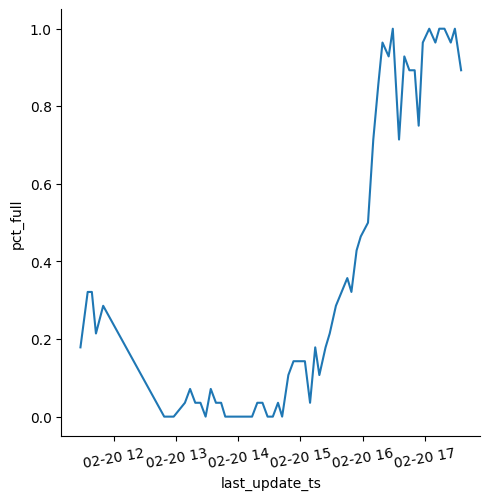

In [431]:
sns.relplot(data=s_1.loc[115:176], kind="line", x="last_update_ts", y="pct_full")
plt.xticks(rotation=10)

In [29]:
print(main_df[["is_open"]].value_counts())

is_open
1          7335
0           175
2            86
5            30
4             5
3             3
Name: count, dtype: int64


In [30]:
main_df[(main_df["is_open"] == 0) & (main_df["empty"] >0)].loc[:,"type":"bike_eyb"].describe()

,type,space,full,empty,bike_yb1,bike_yb2,bike_eyb
count,40.0,40.000000,40.0,40.000000,40.0,40.0,40.0
mean,2.0,20.125000,0.0,20.075000,0.0,0.0,0.0
std,0.0,13.091762,0.0,13.160523,0.0,0.0,0.0
min,2.0,3.000000,0.0,2.000000,0.0,0.0,0.0
25%,2.0,10.000000,0.0,10.000000,0.0,0.0,0.0
50%,2.0,14.500000,0.0,14.500000,0.0,0.0,0.0
75%,2.0,32.250000,0.0,32.250000,0.0,0.0,0.0
max,2.0,50.000000,0.0,50.000000,0.0,0.0,0.0


In [31]:

main_df[(main_df["is_open"] > 1)]

,id,type,space,full,empty,bike_yb1,bike_yb2,bike_eyb,city,lat,lng,is_open,ts,gps
18,500799001,2,5,0,5,0,0,0,MiaoLiXian,24.612617,120.821200,5,2024-01-05 16:12:16,"(24.612617, 120.8212)"
464,500399001,2,26,0,26,0,0,0,TaoYuanShi,24.594650,121.151120,5,2024-01-05 16:12:16,"(24.59465, 121.15112)"
535,500211002,2,26,0,0,0,0,0,XinBeiShi,25.293010,121.536240,2,2024-01-05 16:12:16,"(25.29301, 121.53624)"
611,1702,1,16,0,16,0,0,0,XinBeiShi,25.108260,121.455960,2,2024-01-05 16:11:36,"(25.10826, 121.45596)"
903,500214063,2,16,0,0,0,0,0,XinBeiShi,25.097050,121.642410,2,2024-01-05 16:12:16,"(25.09705, 121.64241)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,501299003,2,25,0,25,0,0,0,KaoXiongShi,22.628844,120.293747,5,2024-01-05 16:12:16,"(22.628844, 120.293747)"
7080,2087,1,18,0,0,0,0,0,TaoYuanShi,24.973517,121.298761,2,2024-01-05 16:12:17,"(24.973517, 121.298761)"
7453,1129,1,64,0,0,0,0,0,XinBeiShi,25.045729,121.426269,2,2024-01-05 16:11:42,"(25.045729, 121.426269)"
7716,1437,1,12,0,12,0,0,0,XinBeiShi,25.099230,121.450630,2,2024-01-05 16:11:32,"(25.09923, 121.45063)"


In [31]:
from numpy.random import rand

In [48]:
main_df_dummy = main_df.copy(deep=True)
city_dummies = rand(main_df_dummy["city"].isna().sum())
main_df_dummy["city_na"] = main_df_dummy["city"].isna()

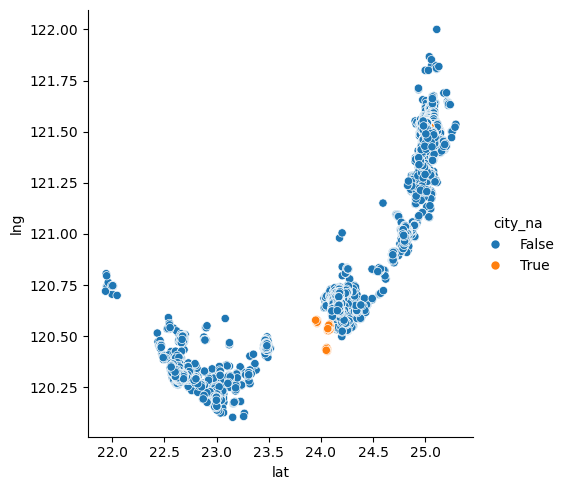

In [52]:
main_df[main_df_dummy["city"].isna()]
sns.relplot(kind="scatter", x="lat", y="lng", data=main_df_dummy[main_df_dummy["lat"] > 20], hue="city_na")

### Transfer to clean df

In [ ]:
bikes_station_clean = main_df.copy()

In [44]:
import numpy as np 
np.isnan(main_df_dummy["city"][0])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [47]:
main_df_dummy["city"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7849    False
7850    False
7851    False
7852    False
7853    False
Name: city, Length: 7854, dtype: bool